In [1]:
%matplotlib inline
import tensorflow as tf
import matplotlib as plt
import numpy as np
import pandas as pd
import cv2
import os
import skimage
from skimage import data
import seaborn as sns
from matplotlib import pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#read in raw dataset
df=pd.read_csv('United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv')

In [3]:
#observation
df.sample(5)

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
5934,11/15/2020,NV,120183,120183.0,0.0,1177,0.0,1909,NaN,NaN,1,0.0,11/16/2020 06:40:02 PM,Agree,NaN
9225,03/22/2020,NJ,1914,NaN,NaN,587,NaN,20,NaN,NaN,4,NaN,03/26/2020 04:22:39 PM,Agree,Agree
28919,02/22/2020,ID,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
33475,08/10/2020,ND,7885,7885.0,0.0,172,0.0,118,NaN,NaN,5,0.0,08/11/2020 02:16:27 PM,Agree,Not agree
5157,04/20/2020,ND,627,627.0,0.0,42,0.0,13,NaN,NaN,3,0.0,04/20/2020 04:22:39 PM,Agree,Not agree


In [4]:
#drop unnecessary columns
df.drop(['conf_cases', 'prob_cases', 'pnew_case', 'conf_death', 'prob_death', 'pnew_death', 'created_at','consent_cases','consent_deaths'], axis=1, inplace=True)

In [5]:
#observation
df.columns=['date','state','total_case','new_case','total_death','new_death']
df.head()
df.tail()

,date,state,total_case,new_case,total_death,new_death
38995,12/11/2020,AZ,394804,6986,7245,91
38996,08/13/2021,FSM,7,0,0,0
38997,12/15/2020,DC,25339,301,720,4
38998,07/06/2021,OR,209494,117,2782,1
38999,01/09/2021,KY,310711,3164,5243,41


In [6]:
#observation
today=df[df.date=='11/01/2021']
today.head()

,date,state,total_case,new_case,total_death,new_death
2695,11/01/2021,CA,4911738,19351,71532,13
2736,11/01/2021,NC,1482464,4950,18104,54
2837,11/01/2021,ID,292317,1001,3571,33
4323,11/01/2021,ND,149207,813,1774,12
4915,11/01/2021,MO,856382,1121,12203,148


In [7]:
#check maximum confirmed cases 
max_confirm=today.sort_values(by="new_case",ascending=False)
max_confirm

,date,state,total_case,new_case,total_death,new_death
2695,11/01/2021,CA,4911738,19351,71532,13
29657,11/01/2021,MI,1285518,10415,23730,39
16546,11/01/2021,CO,747855,7394,8258,72
32166,11/01/2021,IL,1701649,6125,28695,75
2736,11/01/2021,NC,1482464,4950,18104,54
34491,11/01/2021,WI,887242,4785,9430,14
30356,11/01/2021,WA,730108,4673,8659,31
6002,11/01/2021,IN,1022609,3971,16737,54
15108,11/01/2021,MA,855230,3308,19003,7
13061,11/01/2021,UT,553061,3179,3237,29


In [8]:
#check states with most total cases
top_states=max_confirm[0:5]
top_states

,date,state,total_case,new_case,total_death,new_death
2695,11/01/2021,CA,4911738,19351,71532,13
29657,11/01/2021,MI,1285518,10415,23730,39
16546,11/01/2021,CO,747855,7394,8258,72
32166,11/01/2021,IL,1701649,6125,28695,75
2736,11/01/2021,NC,1482464,4950,18104,54


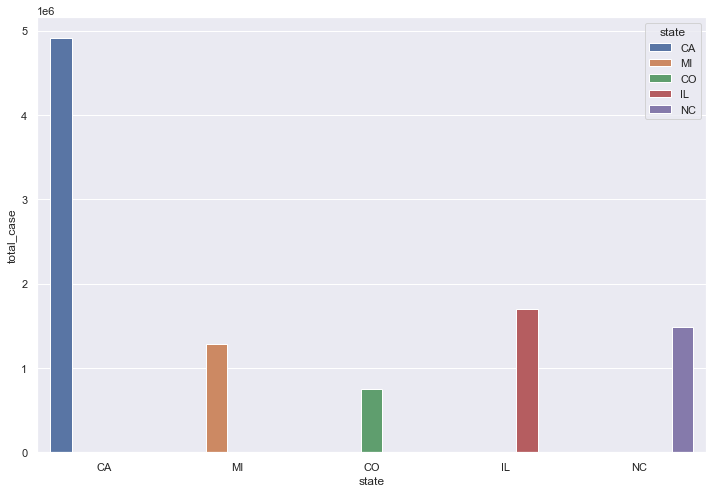

In [9]:
#barplot of states with top confirmed cases
sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(x="state",y="total_case",data=top_states,hue="state")
plt.show()

In [8]:
max_death=today.sort_values(by="total_death",ascending=False)
top_deaths=max_death[0:10]
top_deaths

,date,state,total_case,new_case,total_death,new_death
2695,11/01/2021,CA,4911738,19351,71532,13
23106,11/01/2021,TX,4223527,1211,70000,19
14130,11/01/2021,FL,3652637,2000,59499,2
16108,11/01/2021,NYC,1123702,2107,34590,22
19337,11/01/2021,PA,1567703,2764,31455,1
23701,11/01/2021,GA,1636325,2232,29174,109
32166,11/01/2021,IL,1701649,6125,28695,75
35246,11/01/2021,NJ,1199738,821,27980,8
26150,11/01/2021,OH,1547788,2461,24527,0
29657,11/01/2021,MI,1285518,10415,23730,39


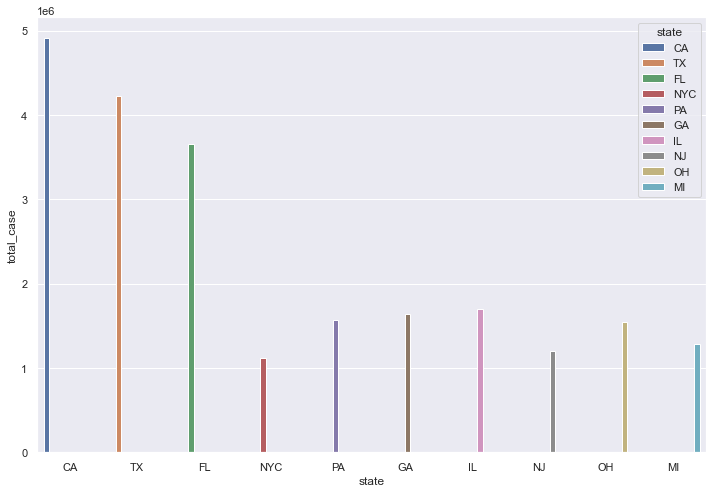

In [9]:
#barplot of top 10 states with most confirmed cases
sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(x="state",y="total_case",data=top_deaths,hue="state")
plt.show()

In [11]:
ca=df[df.state=='CA']
#print(ca)
tx=df[df.state=='TX']
#print(tx)
fl=df[df.state=='FL']
#print(fl)

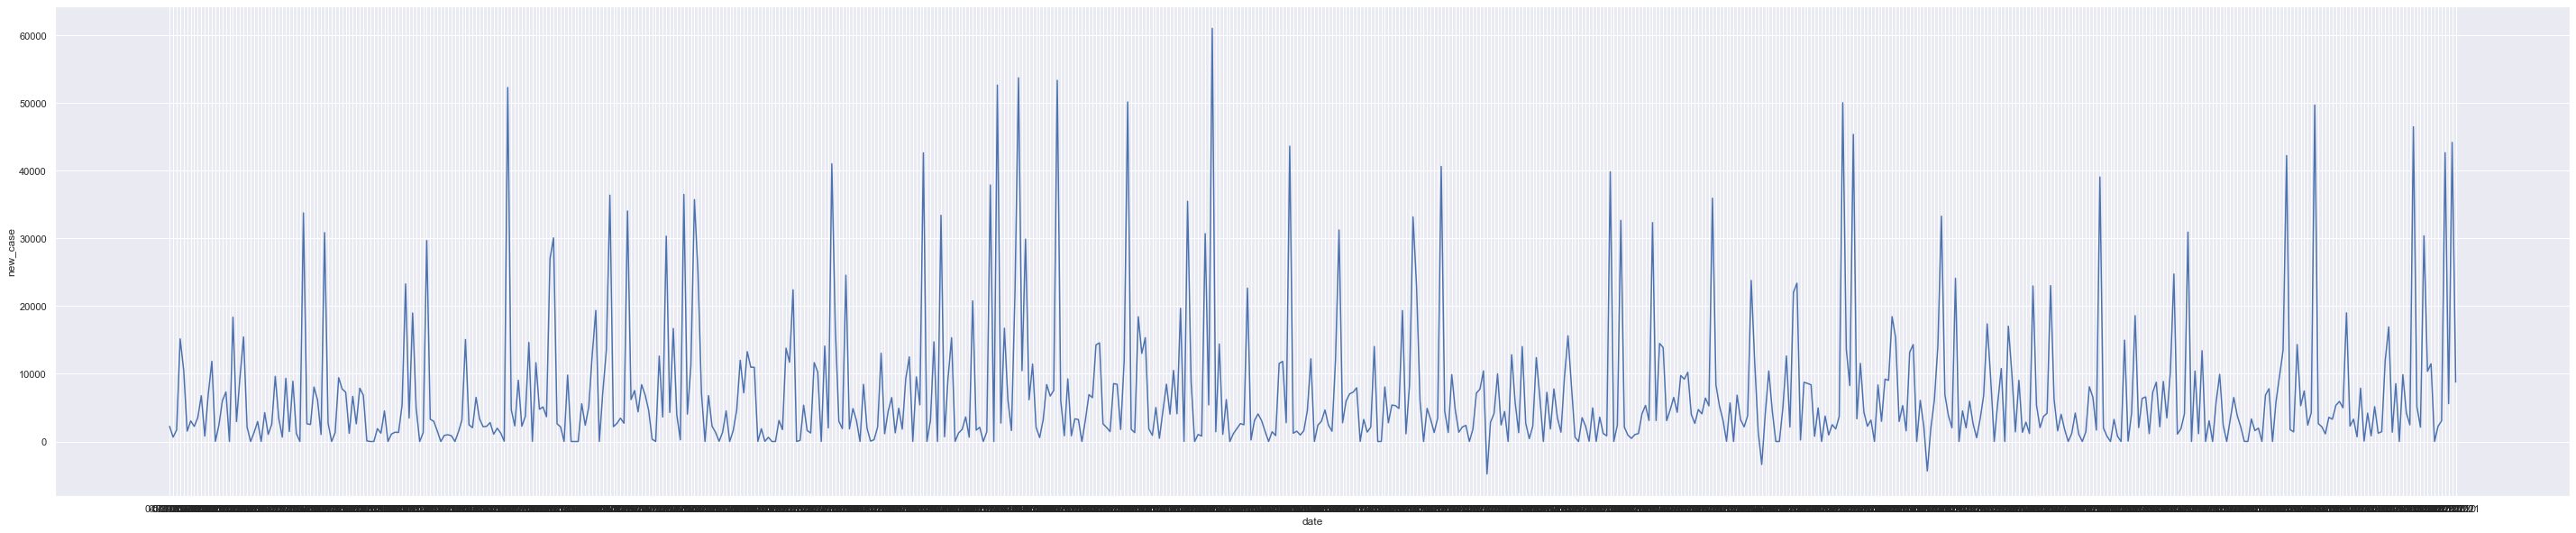

In [12]:
#visualising new cases in the state of CA from baseline
sns.set(rc={'figure.figsize':(50,10)})
sns.lineplot(x="date",y="new_case",data=ca,color="b")
plt.show()

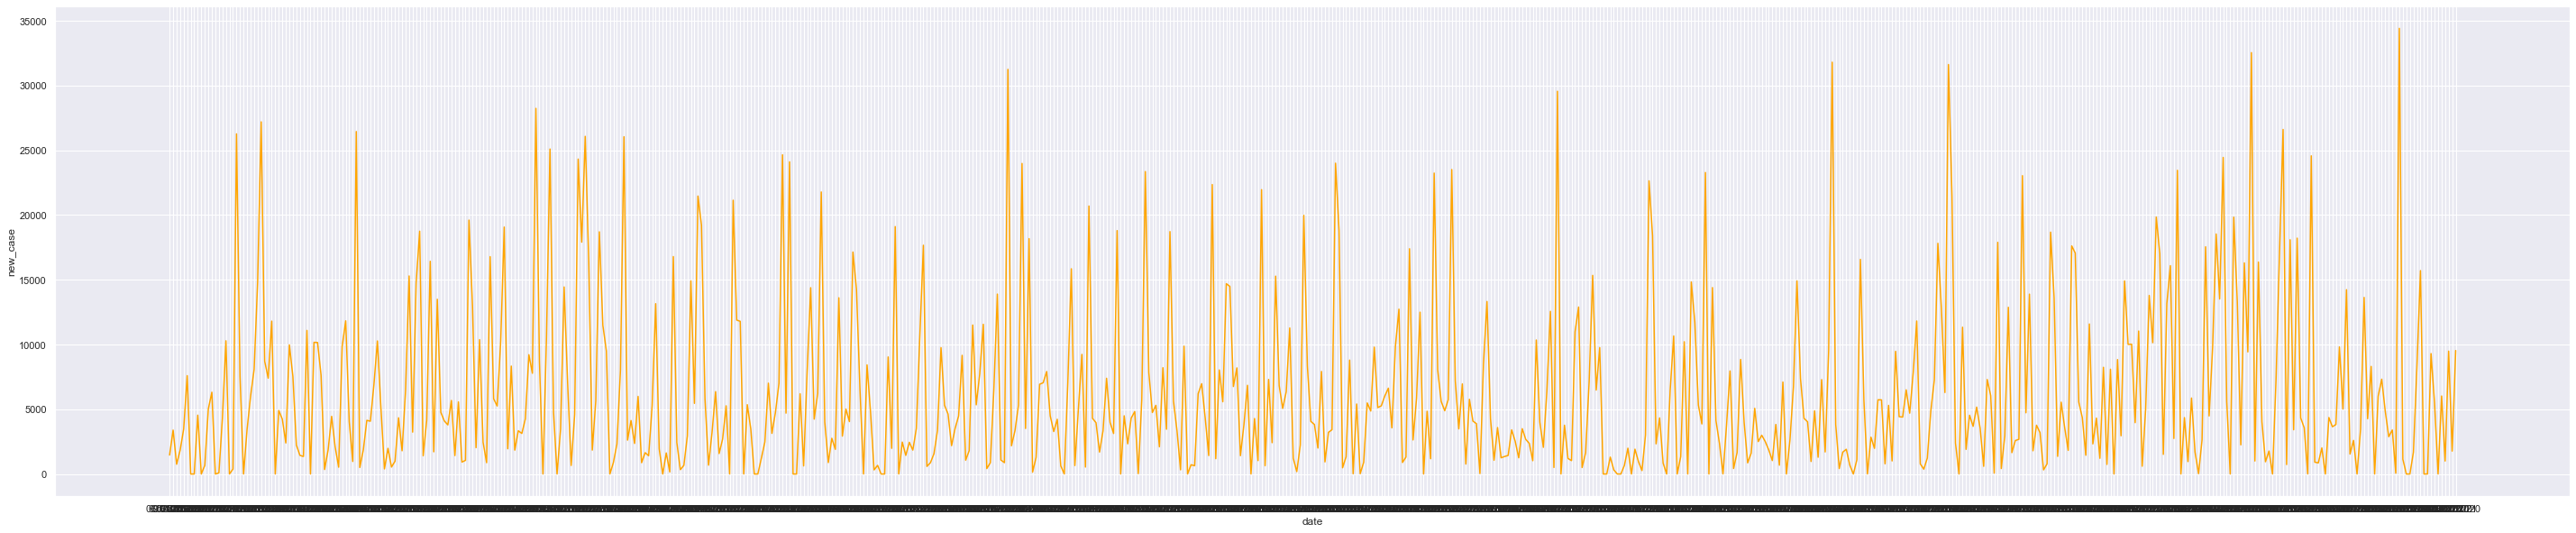

In [17]:
#visualising new cases in the state of TX from baseline
sns.set(rc={'figure.figsize':(50,10)})
sns.lineplot(x="date",y="new_case",data=tx,color="orange")
plt.show()

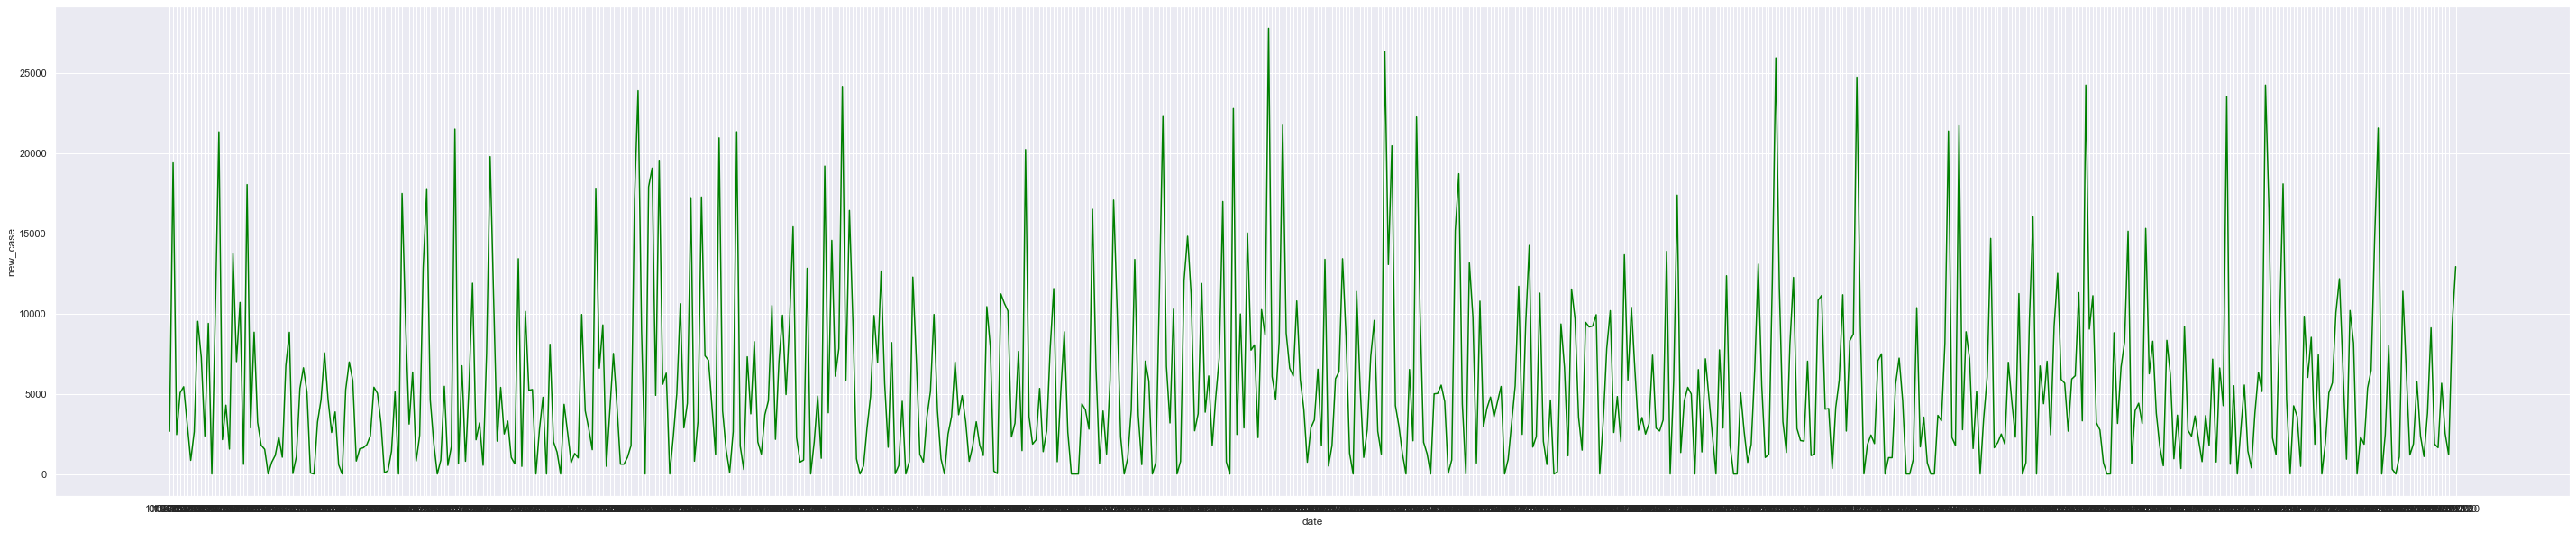

In [16]:
#visualising new cases in the state of FL from baseline
sns.set(rc={'figure.figsize':(50,10)})
sns.lineplot(x="date",y="new_case",data=fl,color="green")
plt.show()

In [18]:
import datetime as dt
from datetime import datetime
ca['date']=pd.to_datetime(df['date'])
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

<ipython-input-18-0eb4d349f356>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca['date']=pd.to_datetime(df['date'])


In [19]:
ca=pd.get_dummies(ca)
#nc.iloc[:,1:].head(20)
ca.head(20)

,date,total_case,new_case,total_death,new_death,state_CA
0,2021-04-01,3570660,2234,58090,154,1
1,2021-05-31,3685032,644,62011,5,1
22,2021-07-01,3712152,1698,63096,73,1
49,2021-08-28,4370175,15157,65139,106,1
54,2020-07-25,445400,10572,8242,146,1
110,2020-04-07,15865,1529,374,31,1
136,2021-03-18,3535534,3038,55795,218,1
139,2021-04-07,3586059,2229,58659,118,1
153,2021-03-04,3488467,3504,52823,394,1
187,2021-02-21,3441946,6760,48807,393,1


In [20]:
#getting dependent and independent variable
x=ca['date']
y=ca['new_case']

In [21]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
#train = cv.fit_transform(x_train)
#test = cv.transform(x_test)

In [22]:
#lr
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
#y_train

In [23]:
#rfg
from sklearn.ensemble import RandomForestRegressor
rfg=RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [24]:
rfg.fit(x_train.values.reshape(-1,1),y_train.values.reshape(-1,1))

<ipython-input-24-5a1e8c573f61>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfg.fit(x_train.values.reshape(-1,1),y_train.values.reshape(-1,1))


RandomForestRegressor(n_estimators=1000, random_state=42)

In [25]:
#reset variable shape
y_pred=rfg.predict(x_test.values.reshape(-1,1))

In [26]:
#y_test.head()
y_pred[0:5]

array([1.4509790e+03, 4.2900000e-01, 5.3308760e+03, 1.2769955e+04,
       6.0000000e-03])

In [27]:
#calculate the mse of our prediction on California
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

29301157.501974758